In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sasmodels.core import load_model
from sasmodels.direct_model import call_kernel
import pandas as pd

## Spherical core

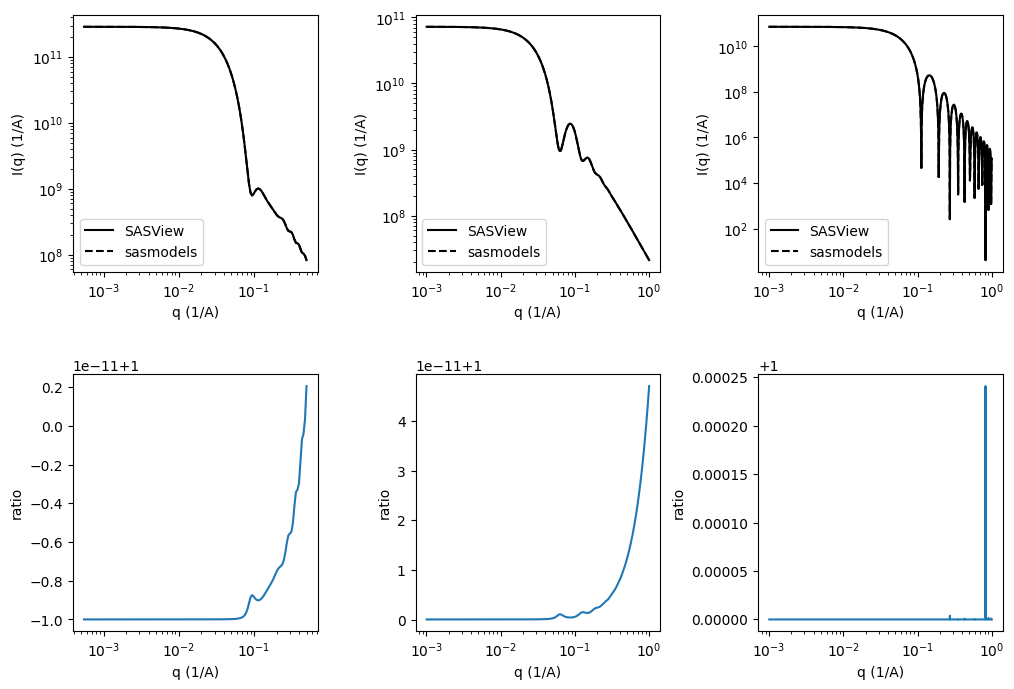

CPU times: user 1.51 s, sys: 103 ms, total: 1.61 s
Wall time: 1.08 s


In [7]:
%%time
files = ["sph_homog", "sph_shell", "sph_core"]
model = load_model("../models/spherical_micelle.py")

fig, axs = plt.subplots(2,3, figsize=(3*4, 2*4))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
# contrasts in the order of solvent, core, corona
contrasts = [[1,2,2], # homogenous
[1,1,2], # corona/shell
[1,2,1] # core
] 
for i in range(3):
    rho_solv, rho_s, rho_c = contrasts[i]
    sphere_params = {'scale':1.0,
        'background' : 0.0,
        'v_core' : 4000.0,    
        'v_corona' : 4000.0,
        'sld_solvent' : rho_solv,
        'sld_core' : rho_s,
        'sld_corona' : rho_c,
        'radius_core': 40.0,
        'rg': 10.0,
        'd_penetration':1.0,
        'x_solv':0.0
        } 
    rows = []
    with open('./SASView/%s.txt'%files[i]) as file:
        for j, line in enumerate(file):
            if j==0:
                continue
            row = [np.float64(l) for l in line.split(' ')]
            rows.append(row)
    data_sasview = np.asarray(rows[1:])
    q = data_sasview[:,0] 
    Iq_sasview = data_sasview[:,1]
    axs[0,i].loglog(q, Iq_sasview, color='k', label="SASView")

    kernel = model.make_kernel([q])
    Iq_sasmodels = call_kernel(kernel, sphere_params)
    axs[0,i].loglog(q, Iq_sasmodels, ls='--', color='k', label="sasmodels")

    # axs[0,i].set_xlim([1e-2, 1e0])
    axs[0,i].set_xlabel(r'q (1/A)')
    axs[0,i].set_ylabel(r'I(q) (1/A)')
    axs[0,i].legend()

    axs[1,i].plot(q, Iq_sasview/Iq_sasmodels)
    axs[1,i].set_xlabel(r'q (1/A)')
    axs[1,i].set_ylabel(r'ratio')
    axs[1,i].set_xscale('log')
plt.show()

## Cylinder

*CYL+Chains(RW)_Rc* 
https://github.com/SASfit/SASfit/blob/master/src/sasfit_ff/cyl_rwbrush/sasfit_ff_cyl_rwbrush_rc.c

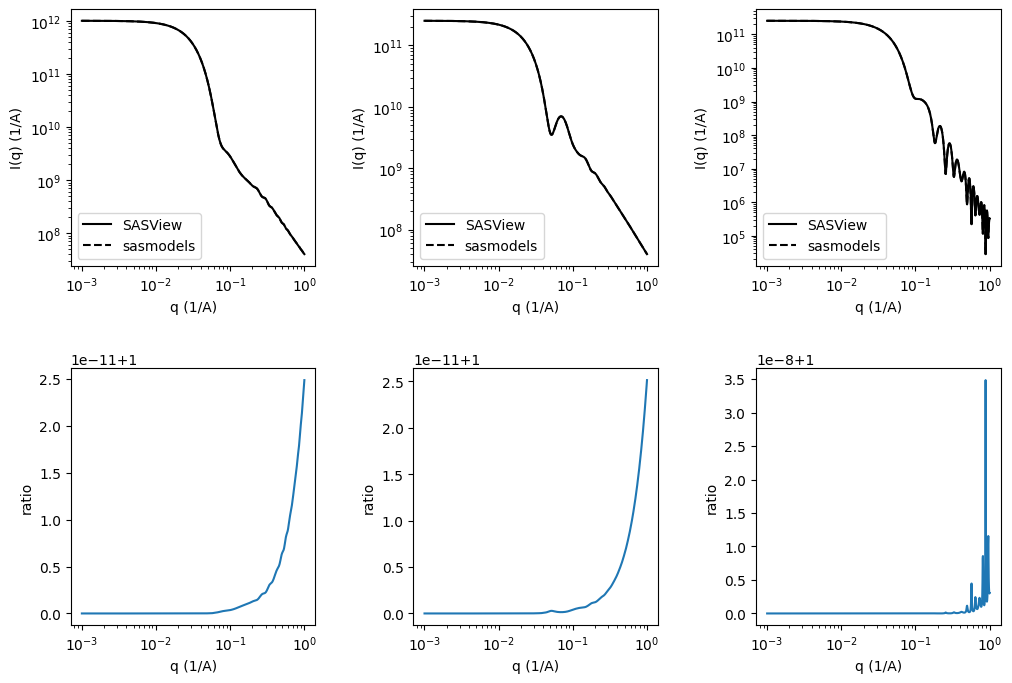

In [8]:
files = ["cyl_homog", "cyl_shell", "cyl_core"]
model = load_model("../models/cylindrical_micelle.py")

fig, axs = plt.subplots(2,3, figsize=(3*4, 2*4))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
contrasts = [[1,2,2], [1,1,2], [1,2,1]]
for i in range(3):
    rho_solv, rho_s, rho_c = contrasts[i]
    cyl_params = {'v_core' : 4000.0,    
            'v_corona' : 4000.0,
            'sld_solvent' : rho_solv,
            'sld_core' : rho_s,
            'sld_corona' : rho_c,
            'radius_core': 40.0,
            'length_core' : 100.0,
            'rg': 10.0,
            'd_penetration':1.0,
            'scale':1.0,
            'background' : 0.0,
            }
    rows = []
    with open('./SASView/%s.txt'%files[i]) as file:
        for j, line in enumerate(file):
            if j==0:
                continue
            row = [np.float64(l) for l in line.split(' ')]
            rows.append(row)
    data_sasview = np.asarray(rows[1:])
    q = data_sasview[:,0] 
    Iq_sasview = data_sasview[:,1]
    axs[0,i].loglog(q, Iq_sasview, color='k', label="SASView")
    kernel = model.make_kernel([q])
    Iq_sasmodels = call_kernel(kernel, cyl_params)
    axs[0,i].loglog(q, Iq_sasmodels, ls='--', color='k', label="sasmodels")
    axs[0,i].set_xlabel(r'q (1/A)')
    axs[0,i].set_ylabel(r'I(q) (1/A)')
    axs[0,i].legend()
    axs[1,i].plot(q, Iq_sasview/Iq_sasmodels)
    axs[1,i].set_xlabel(r'q (1/A)')
    axs[1,i].set_ylabel(r'ratio')
    axs[1,i].set_xscale('log')
plt.show()